# 量的データの分析

## 1. 基本統計量の確認

まず、Pandasを使ってサンプルデータを読み込もう。

In [1]:
import pandas as pd
df = pd.read_csv('example1.csv')

In [2]:
df

,score,faculty,sex
0,77,A,male
1,53,A,male
2,72,A,male
3,50,A,male
4,49,A,male
...,...,...,...
115,63,C,female
116,68,C,female
117,50,C,female
118,56,C,female


変数 `df` には `pandas.DataFrame` という２次元の表形式のデータが代入されている。
このとき、次のように、データの各列（量的変数のみ）の基本統計量を確認することができる。

In [3]:
df.describe()

,score
count,120.000000
mean,66.700000
std,12.566194
min,37.000000
25%,59.000000
50%,66.000000
75%,74.500000
max,100.000000


## 2. 分布の確認

データの分布を確認しよう。
次のように、指定した列のデータの分布をヒストグラムで表すことができる。

(array([ 2., 11.,  8., 20., 28., 21., 15.,  9.,  3.,  3.]),
 array([ 37. ,  43.3,  49.6,  55.9,  62.2,  68.5,  74.8,  81.1,  87.4,
         93.7, 100. ]),
 <BarContainer object of 10 artists>)

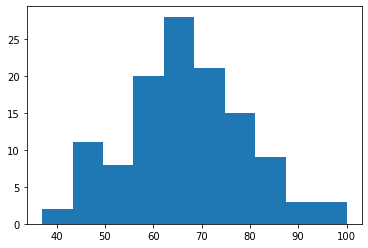

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['score'])

また、次のように、各列のデータの分布を箱ひげ図で表すこともできる。

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e40837af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e40842190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e40837790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e40842820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e40842b20>],
 'means': []}

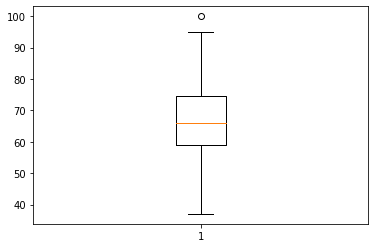

In [5]:
plt.boxplot(df['score'])

次に、より高機能なライブラリ Seaborn を使ってみよう。
Seaborn では、次のように箱ひげ図を作ることができる。

<AxesSubplot:ylabel='score'>

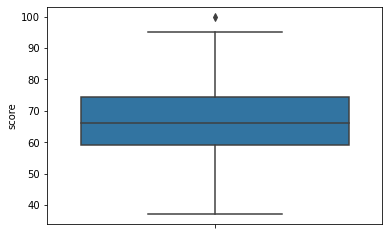

In [6]:
import seaborn as sns
sns.boxplot(y='score', data=df)

さらに、`x='faculty'` のように引数を指定すると、"faculty" (学部) ごとに箱ひげ図を作成できる。

<AxesSubplot:xlabel='faculty', ylabel='score'>

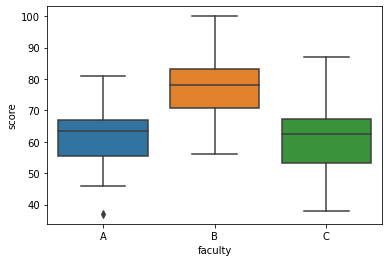

In [7]:
sns.boxplot(x='faculty', y='score', data=df)

さらに、`hue='sex'` のように引数を指定すると、"sex" (性別) ごとに箱ひげ図を作成できる。

<AxesSubplot:xlabel='faculty', ylabel='score'>

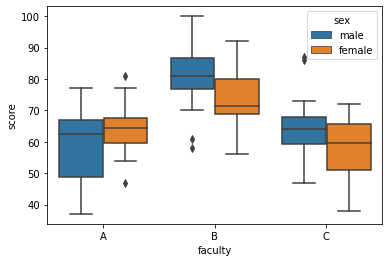

In [8]:
sns.boxplot(x='faculty', y='score', hue='sex', data=df)

また、**バイオリンプロット**という分布の表現方法を紹介しよう。
バイオリンプロットでは、ヒストグラムを滑らかにつないだもの (カーネル密度推定という) によって分布の形状を表現する。
分布の形状が単峰ではなく複雑な形状を持つ場合には、バイオリンプロットを使うのが好ましい。

<AxesSubplot:ylabel='score'>

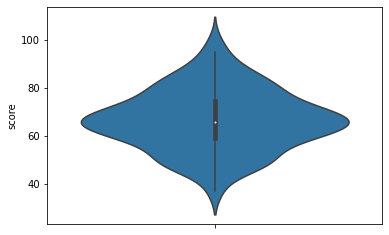

In [9]:
sns.violinplot(y='score', data=df)

<AxesSubplot:xlabel='faculty', ylabel='score'>

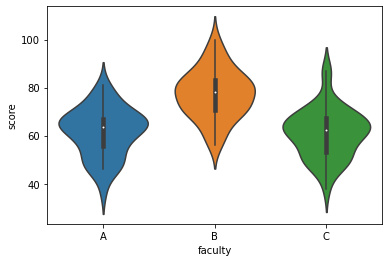

In [10]:
sns.violinplot(x='faculty', y='score', data=df)

<AxesSubplot:xlabel='faculty', ylabel='score'>

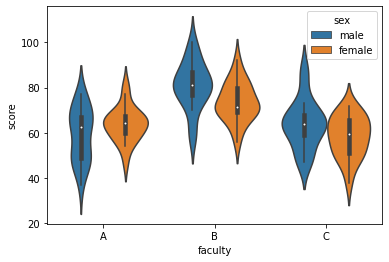

In [11]:
sns.violinplot(x='faculty', y='score', hue='sex', data=df)

## 3. 相関関係の確認

まず、サンプルデータを読み込もう。

In [12]:
df2 = pd.read_csv('example2.csv')

In [13]:
df2

,city A,city B,city C,city D,city E
0,26.0,19.0,3.0,-4.0,31.0
1,26.0,21.0,7.0,-1.0,29.0
2,26.0,23.0,10.0,-0.0,25.0
3,30.0,26.0,16.0,3.0,21.0
4,33.0,28.0,20.0,9.0,17.0
5,34.0,28.0,23.0,13.0,12.0
6,35.0,33.0,24.0,15.0,9.0
7,34.0,31.0,22.0,13.0,13.0
8,33.0,29.0,21.0,9.0,15.0
9,31.0,25.0,14.0,4.0,20.0


次に、散布図を描画してみよう。

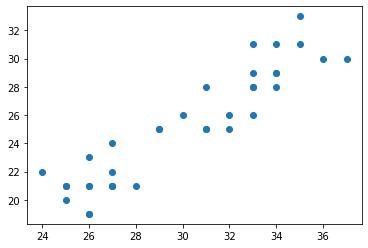

In [14]:
plt.scatter(df2['city A'], df2['city B'])

Seaborn を利用すると、変数の全ての組み合わせについて、まとめて散布図を描画することができる。これを**散布図行列**という。

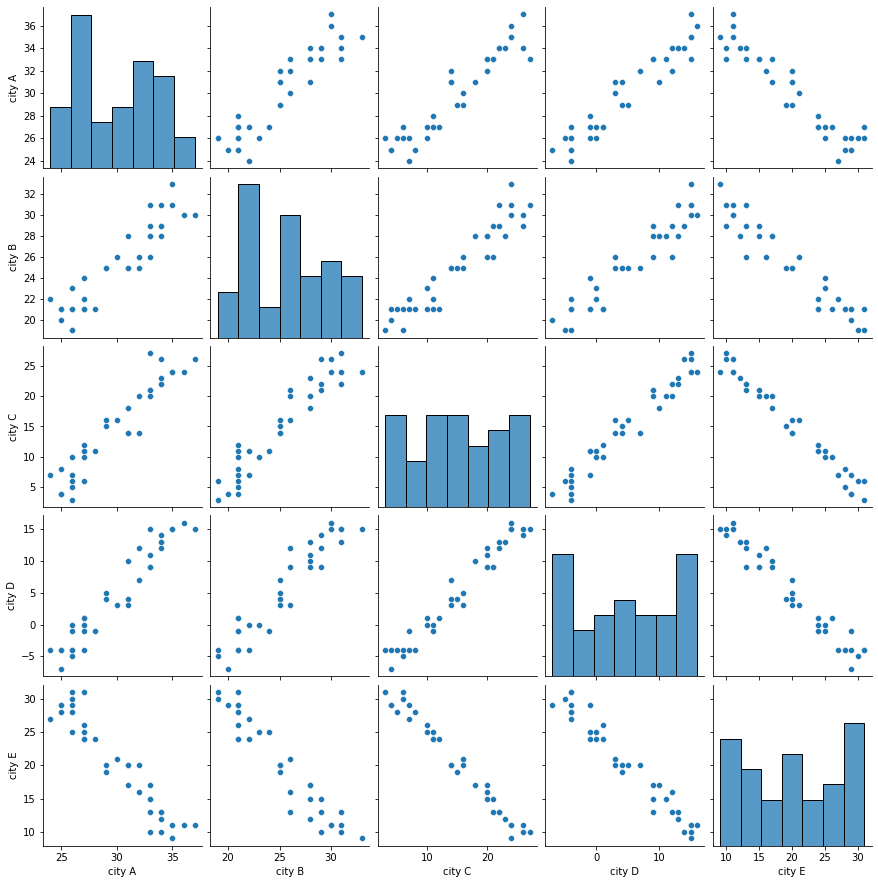

In [15]:
sns.pairplot(df2)

次に、相関関係の強さを定量的に表現するために、相関係数を計算しよう。
`corr`メソッドにより、変数の全ての組み合わせについて、まとめて相関係数を計算することができる。
これを**相関係数行列**という。

In [16]:
corr = df2.corr()

In [17]:
corr

,city A,city B,city C,city D,city E
city A,1.000000,0.924037,0.945586,0.959416,-0.949387
city B,0.924037,1.000000,0.947246,0.948307,-0.955327
city C,0.945586,0.947246,1.000000,0.975954,-0.986234
city D,0.959416,0.948307,0.975954,1.000000,-0.975671
city E,-0.949387,-0.955327,-0.986234,-0.975671,1.000000


Seaborn を利用すると、行列の各要素を色で表現することができる。この図のことをヒートマップという。

<AxesSubplot:>

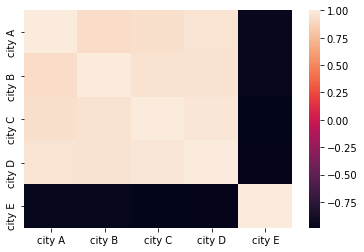

In [18]:
sns.heatmap(corr)